In [1]:
# current date, for retrieving data from proper location.
year = "2023"
month = "December"
day = "13"

## Imports and initialization

In [2]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import curve_fit
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
markersize = 10
capsize = 5
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [3]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

# Today's Work

In [4]:
atomlocs = [2, 2, 3, 3, 1]

In [5]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

In [6]:
mp.Transfer(8, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 75)]);

OSError! Exception: Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/December/December 13/Raw Data/data_8.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/December/December 13/Raw Data/data_8.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


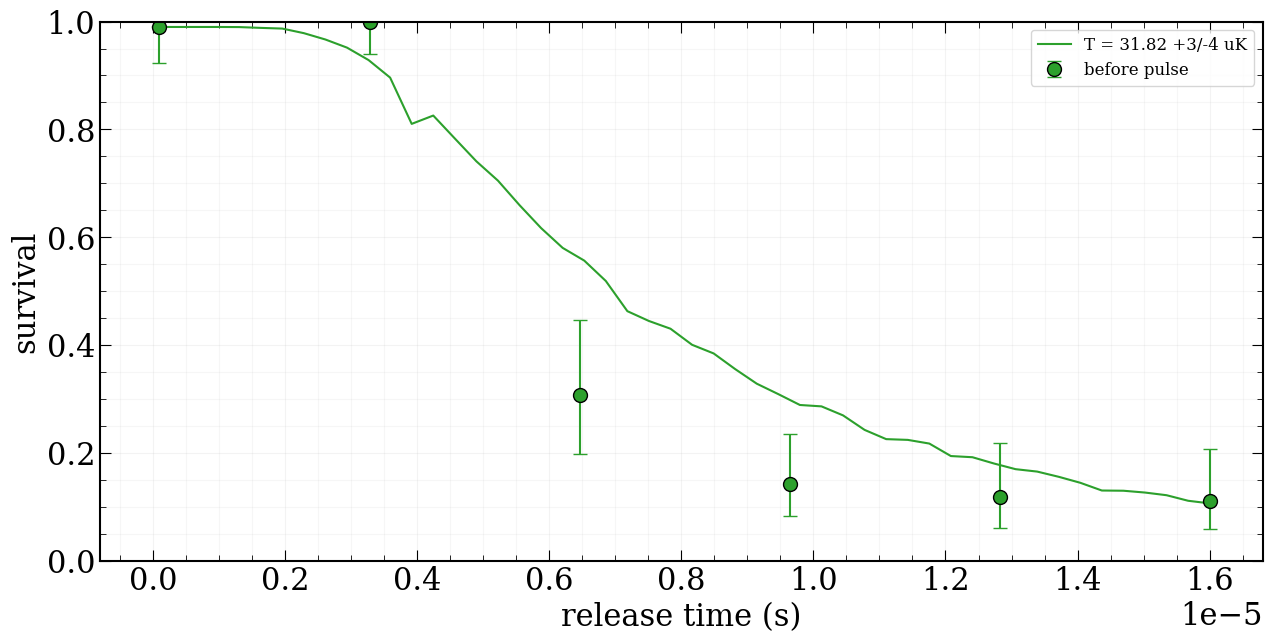

In [25]:
fileId1 = 11
fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
load_one_y1[0]=.99
# load_one_y1[3]=.4
# load_one_y1[4]=.2
load_one_y2[0]=.95
load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'before pulse')

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

In [36]:
print(load_one_err1)

[[0.06696219388171287, 0.05929706966940618, 0.10969624634768058, 0.059277965174073785, 0.056282606264426514, 0.05320569627933086], [0.0264652889799758, 0.0012319178971036404, 0.1379580124596167, 0.09240511960416553, 0.09984355588376329, 0.09513819062056028]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



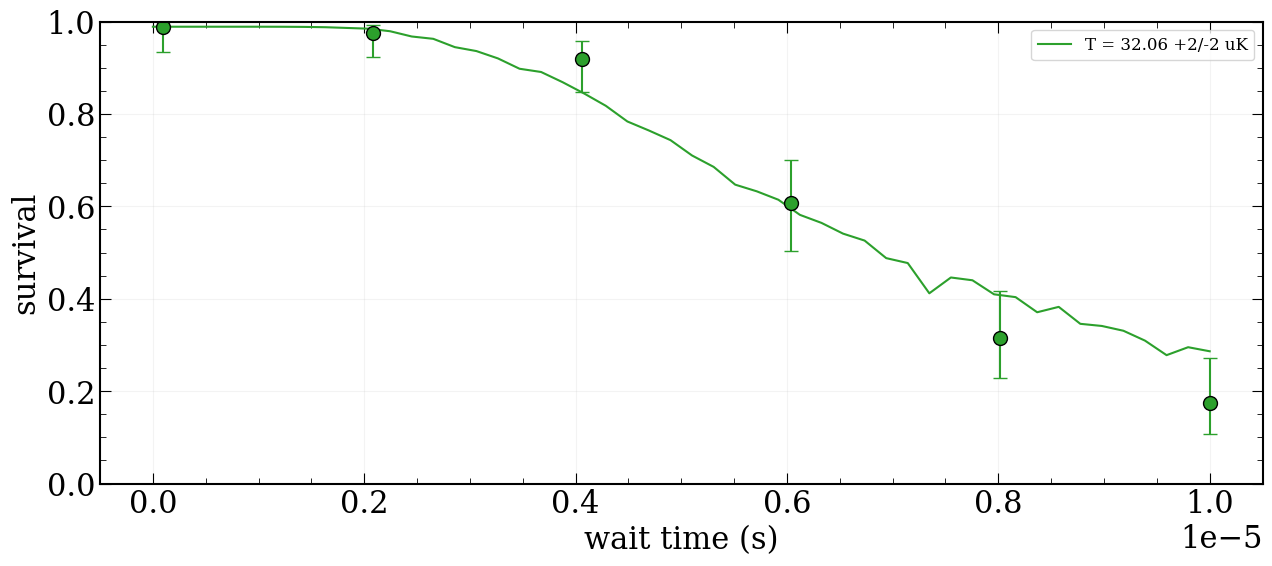

In [37]:
dataset1 = ta.standardTransferAnalysis(13, tao.getStandardSurvivalOptions([2,2,3,3,1]));
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]   

fig, ax = plt.subplots(figsize=(15, 6))
# t = np.linspace(0, 50e-3, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)

ah.releaseRecaptureTemp(key1,avgTferData1,err1,tempGuess=20e-6,
                        trapDepth=1e-3,rrange=(1e-6,200e-6,0.2e-6),color=color1)

# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
# plt.xlim(0,.02)
plt.ylabel('survival')
plt.xlabel('wait time (s)')
plt.rcParams["axes.linewidth"] = 1.5


 2024
January, February, March, April, May, June, July, August, September, October, November, December, 

(20.0, 30.0)

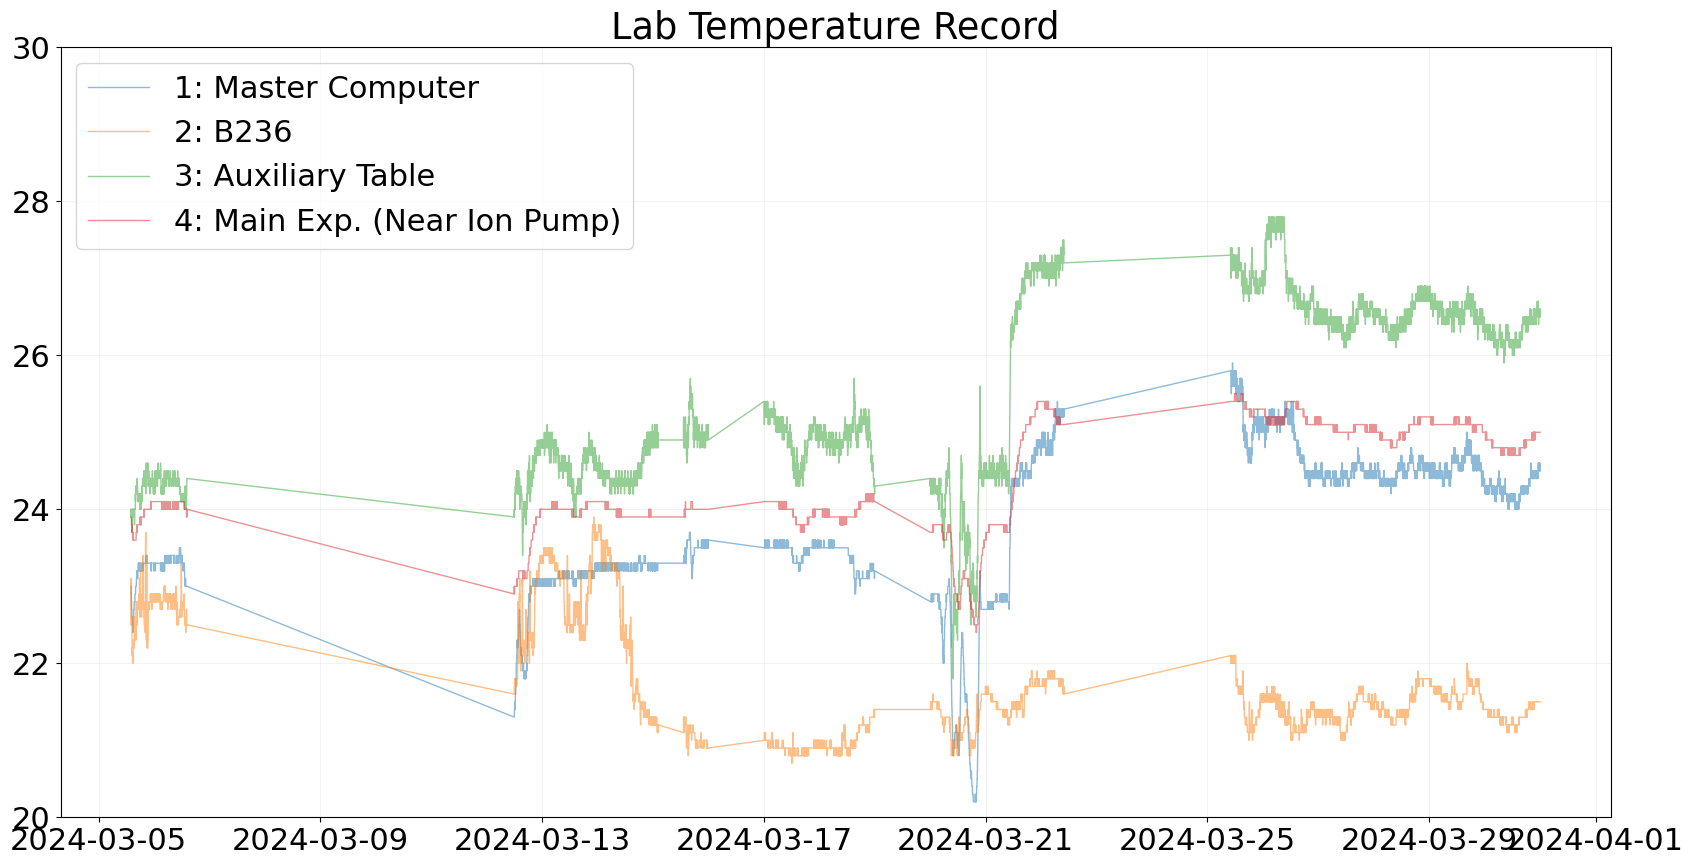

In [47]:
cTemps, cTimes = ca.loadAllTemperatureData()
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
fig, ax = plt.subplots(figsize=(20,10))
for temp,lab in zip(misc.transpose(cTemps), legends):
    ax.plot(cTimes,temp, label=lab, alpha=0.5, linewidth=1)
ax.legend()
ax.set_title('Lab Temperature Record');
ax.set_ylim(20,30)